# Email Spam Classifier 

In [33]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as plt
import string 
%matplotlib inline
import collections
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import feature_extraction
import nltk

In [3]:
os.listdir('/Users/KBrig/ML-Pipeline')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'ML-Pipeline',
 'ML-Pipeline.ipynb',
 'README.md',
 'Spam.csv']

# Data Reading and Exploring 

In [4]:
path='/Users/KBrig/ML-Pipeline/spam.csv'
#EmData= pd.read_csv('Spam.csv',encoding='cp1252')
EmData= pd.read_csv(path,encoding='cp1252',dtype={'type':np.str, 'Email_body':np.str})

In [5]:
EmData.head()

type                                         Email_body Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [6]:
EmData=EmData[['type','Email_body']]

In [7]:
EmData.head(3)

type                                         Email_body
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...

In [8]:
#print(EmData.shape)
for col in EmData.columns:
    print ('column', col,':', type(col[0]))

column type : <class 'str'>
column Email_body : <class 'str'>


In [9]:
EmData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
type          5572 non-null object
Email_body    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [10]:
EmData.groupby('type').describe()

Email_body                                                               
          count unique                                                top freq
type                                                                          
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

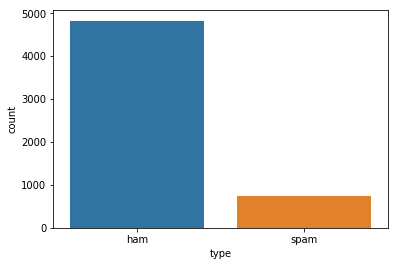

In [11]:
sns.countplot(x='type',data=EmData)

Unsurprisingly, we have much more "ham" emails than of the spam type!

In [12]:
EmData['y']=EmData['type'].apply(lambda x: x =='spam').astype(int)

In [13]:
EmData.head()

type                                         Email_body  y
0   ham  Go until jurong point, crazy.. Available only ...  0
1   ham                      Ok lar... Joking wif u oni...  0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...  1
3   ham  U dun say so early hor... U c already then say...  0
4   ham  Nah I don't think he goes to usf, he lives aro...  0

In [14]:
EmData['Email_body']=EmData['Email_body'].astype('str',copy=True)
#EmData['Email_body']=EmData['Email_body'].astype('|S')

In [15]:
EmData['lngth']= EmData['Email_body'].apply(len)
#EmData.assign(ln_massg = lambda x: np.len(x.Email_body))

In [16]:
EmData.head()

type                                         Email_body  y  lngth
0   ham  Go until jurong point, crazy.. Available only ...  0    111
1   ham                      Ok lar... Joking wif u oni...  0     29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...  1    155
3   ham  U dun say so early hor... U c already then say...  0     49
4   ham  Nah I don't think he goes to usf, he lives aro...  0     61

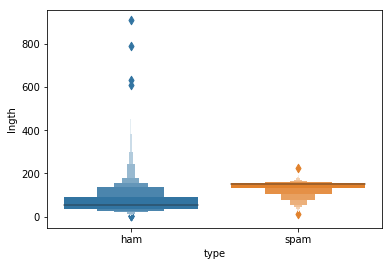

In [17]:
sns.boxenplot(x='type',y='lngth', data=EmData)


From the previous plot, we can notice that the "ham" class has much longer messages than those of the "spam" type!

# Feature Vectorization

In order to apply the ML classification algorithms, we need to transform our raw data (text) into vectors (Numerical Data)which is known as Tokenaization

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

We are going to apply a simple technique known as "Bag of Words" for vectorizing our messages.

In [19]:
#Count how many times does a word occur in each message (Known as term frequency)
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer()

#Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
#Normalize the vectors to unit length, to abstract from the original text length (L2 norm)
## TfidfTransformer()

from sklearn.feature_extraction.text import TfidfTransformer


# Spliting Data into Training and Test Sets

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(EmData['Email_body'], EmData['type'], test_size=0.3)


# Building ML Pipeline with Logistic Regression Classifier

In [23]:
from sklearn.linear_model import LogisticRegression
pipeline_LR = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')),  # train on TF-IDF vectors with Logistic Regression classifier
])


In [24]:
pipeline_LR.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip..., penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [25]:
predictions_LR = pipeline_LR.predict(x_test)

In [26]:
print(classification_report(predictions_LR,y_test))

             precision    recall  f1-score   support

        ham       1.00      0.98      0.99      1477
       spam       0.86      1.00      0.92       195

avg / total       0.98      0.98      0.98      1672



# Building ML Pipeline with Naieve Bayes Classifier

In [35]:
nltk.download('stopwords')
nltk.download('white_list')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KBrig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading white_list: Package 'white_list' not found
[nltk_data]     in index


False

In [38]:
def extract_features(corpus):
    
    #Extract TF-IDF features from corpus

    mssg_stop_words = nltk.corpus.stopwords.words("english")

    # words that might invert a sentence's meaning
    white_list = [
        'what', 'but', 'if', 'because', 'as', 'until', 'against',
        'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
        'further', 'then', 'once', 'here', 'there', 'why', 'how', 'all', 'any',
        'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
        'same', 'so', 'than', 'too', 'can', 'will', 'just', 'don', 'should']

    # take these out of the standard NLTK stop word list
    mssg_stop_words = [w for w in mssg_stop_words if w not in white_list]

    # vectorize means we turn non-numerical data into an array of numbers
    count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=nltk.word_tokenize,  # use the NLTK tokenizer
       # min_df=2,  # minimum document frequency, i.e. the word must appear more than once
        ngram_range=(1, 2),
        stop_words=mssg_stop_words
    )
    processed_corpus = count_vectorizer.fit_transform(corpus)
    processed_corpus = feature_extraction.text.TfidfTransformer().fit_transform(processed_corpus)

    return processed_corpus

In [27]:
from sklearn.naive_bayes import MultinomialNB

pipeline_NB = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', MultinomialNB()),  # train on TF-IDF vectors with Naive Bayes classifier
])


In [28]:
pipeline_NB.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [29]:
predictions_NB = pipeline_NB.predict(x_test)

In [37]:
print(classification_report(predictions_NB,y_test))

             precision    recall  f1-score   support

        ham       1.00      0.95      0.98      1517
       spam       0.68      1.00      0.81       155

avg / total       0.97      0.96      0.96      1672



In [49]:
from sklearn.naive_bayes import MultinomialNB

mssg_stop_words = nltk.corpus.stopwords.words("english")

    # words that might invert a sentence's meaning
white_list = [
        'what', 'but', 'if', 'because', 'as', 'until', 'against',
        'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
        'further', 'then', 'once', 'here', 'there', 'why', 'how', 'all', 'any',
        'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
        'same', 'so', 'than', 'too', 'can', 'will', 'just', 'don', 'should']

    # take these out of the standard NLTK stop word list
mssg_stop_words = [w for w in mssg_stop_words if w not in white_list]

pipeline_NBMod = Pipeline([
    ('vect', CountVectorizer(lowercase=True,tokenizer=nltk.word_tokenize, min_df=2, ngram_range=(1, 2),stop_words=mssg_stop_words)), 
    ('tfidf', TfidfTransformer()),  
    ('clf', MultinomialNB()),  # train on TF-IDF vectors with Naive Bayes classifier
])


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(EmData['Email_body'], EmData['type'], test_size=0.3)
nltk.download('punkt')

pipeline_NBMod.fit(x_train,y_train)
predictions_NBMod = pipeline_NBMod.predict(x_test)
print(classification_report(predictions_NBMod,y_test))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KBrig\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
             precision    recall  f1-score   support

        ham       1.00      0.94      0.97      1529
       spam       0.62      1.00      0.77       143

avg / total       0.97      0.95      0.95      1672



# Building ML Pipeline with SVM Classifier

In [283]:
from sklearn.linear_model import SGDClassifier

pipeline_SVM = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),  # train on TF-IDF vectors with SVM classifier
])


In [284]:
pipeline_SVM.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False))])

In [285]:
predictions_SVM = pipeline_SVM.predict(x_test)

In [286]:
print(classification_report(predictions_SVM,y_test))

             precision    recall  f1-score   support

        ham       1.00      0.97      0.99      1488
       spam       0.83      0.99      0.90       184

avg / total       0.98      0.98      0.98      1672



# Building ML Pipeline with Decision Trees Classifier

In [287]:
from sklearn import tree

pipeline_DT = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', tree.DecisionTreeClassifier()),  # train on TF-IDF vectors with DT classifier
])


In [288]:
pipeline_DT.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [289]:
predictions_DT = pipeline_DT.predict(x_test)

In [290]:
print(classification_report(predictions_DT,y_test))

             precision    recall  f1-score   support

        ham       0.98      0.97      0.98      1463
       spam       0.82      0.87      0.85       209

avg / total       0.96      0.96      0.96      1672



# Building ML Pipeline with Ensamble methods Classifier

In [291]:
from sklearn.ensemble import RandomForestClassifier

In [292]:
pipeline_Ens = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', RandomForestClassifier(n_estimators=10)),  # train on TF-IDF vectors with Ensample methods "Randomized DTs" classifier
])

In [293]:
pipeline_Ens.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [294]:
predictions_Ens = pipeline_Ens.predict(x_test)

In [295]:
print(classification_report(predictions_Ens,y_test))

             precision    recall  f1-score   support

        ham       1.00      0.97      0.98      1500
       spam       0.78      1.00      0.88       172

avg / total       0.98      0.97      0.97      1672



In [1]:
from yellowbrick.classifier import ClassificationReport
classification_report(predictions_Ens,y_test).proof()

ModuleNotFoundError: No module named 'yellowbrick'

In [302]:
viz = PrecisionRecallCurve(predictions_Ens())
viz.poof()

NameError: name 'PrecisionRecallCurve' is not defined